In [60]:

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [61]:
import numpy as np
import pandas as pd

In [62]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
first_row = session.query(Measurement).first()
table_dictionary = first_row.__dict__
print(table_dictionary.keys())

first_row = session.query(Station).first()
table_dictionary = first_row.__dict__
print(table_dictionary.keys())


year_ago = dt.date.today() - dt.timedelta(days=365)

before_year = year_ago - dt.timedelta(days=365)

print(session.query(Measurement.date).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all())
print(year_ago)
 

# Save the query results as a Pandas DataFrame and set the index to the date 

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


# Rotate the xticks for the dates


dict_keys(['_sa_instance_state', 'tobs', 'date', 'id', 'prcp', 'station'])
dict_keys(['_sa_instance_state', 'longitude', 'name', 'id', 'elevation', 'latitude', 'station'])
[]
2017-10-30


In [12]:
session.query(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

In [13]:
# Perform a query to retrieve the date and precipitation scores

precipitation_scores = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= before_year).all()
precipitation_scores


[(0.24, '2016-10-30'),
 (0.03, '2016-10-31'),
 (0.0, '2016-11-01'),
 (0.0, '2016-11-02'),
 (0.0, '2016-11-03'),
 (0.0, '2016-11-04'),
 (0.0, '2016-11-05'),
 (0.0, '2016-11-06'),
 (0.0, '2016-11-07'),
 (0.07, '2016-11-08'),
 (0.0, '2016-11-09'),
 (0.0, '2016-11-10'),
 (0.0, '2016-11-11'),
 (0.0, '2016-11-12'),
 (0.0, '2016-11-13'),
 (0.0, '2016-11-14'),
 (0.0, '2016-11-15'),
 (0.0, '2016-11-16'),
 (0.0, '2016-11-17'),
 (0.0, '2016-11-18'),
 (0.03, '2016-11-19'),
 (0.05, '2016-11-20'),
 (0.01, '2016-11-21'),
 (0.13, '2016-11-22'),
 (0.14, '2016-11-23'),
 (0.05, '2016-11-24'),
 (0.05, '2016-11-25'),
 (0.05, '2016-11-26'),
 (0.0, '2016-11-27'),
 (0.01, '2016-11-28'),
 (0.0, '2016-11-29'),
 (0.14, '2016-11-30'),
 (0.12, '2016-12-01'),
 (0.03, '2016-12-02'),
 (0.0, '2016-12-03'),
 (0.03, '2016-12-04'),
 (0.43, '2016-12-05'),
 (0.02, '2016-12-06'),
 (0.0, '2016-12-07'),
 (0.03, '2016-12-08'),
 (0.52, '2016-12-09'),
 (0.05, '2016-12-10'),
 (0.04, '2016-12-11'),
 (0.01, '2016-12-12'),
 (0.05, '

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df=pd.DataFrame(precipitation_scores, columns= ["Precipitation", "Date"])
df.set_index(df['Date'])
df = df[["Date", "Precipitation"]]
df.set_index(df['Date'], inplace=True)
df

df.describe()

,Precipitation
count,1628.000000
mean,0.165541
std,0.432481
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


<function matplotlib.pyplot.show(*args, **kw)>

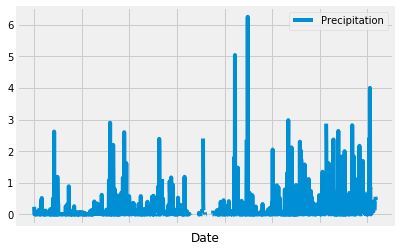

In [15]:
df.plot(x_compat=True)
plt.show


In [16]:
# How many stations are available in this dataset?

Station_count = session.query(Station.id).count()
Station_count


9

In [20]:
# What are the most active stations?
# List the stations and the counts in descending order.
Station_count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Measurement_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Measurement_station                                    
                                    


[(54.0, 85.0, 71.66378066378067)]

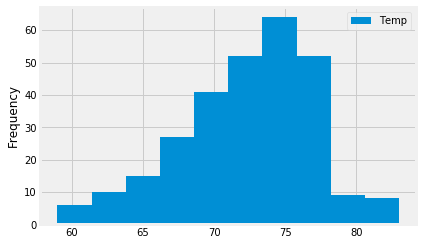

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_temp= session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= before_year).all()
results_temp
df=pd.DataFrame(results_temp, columns= ["Temp"])

df.plot.hist()
plt.show()


In [30]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2017-01-01', '2017-08-31')

before_year = year_ago - dt.timedelta(days=365)
year_ago = dt.date.today() - dt.timedelta(days=365)
before_yearstart = dt.date(2017,1,1) - dt.timedelta(days=365)
before_yearend = dt.date(2017,8,1) - dt.timedelta(days=365)

calc_temps(before_yearstart, before_yearend)



[(56.0, 73.00749625187406, 83.0)]

In [43]:
tmin, tavg, tmax = calc_temps(before_yearstart, before_yearend)[0]

83.0

C:\Users\izzylou\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


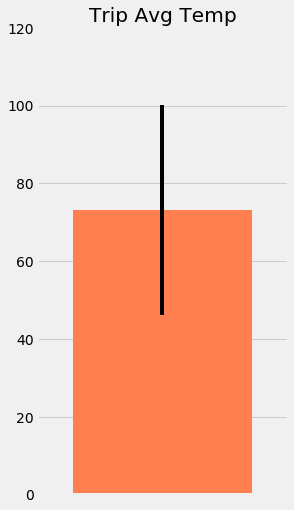

In [63]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = 1


fig, ax = plt.subplots(figsize = plt.figaspect(2.))
yerr = tmax - tmin
ax.bar(x, tavg, yerr = yerr, color = "coral") 

ax.set(xticks = range(x), title = "Trip Avg Temp")
ax.margins(.2, .2)


fig.show()



In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#Use start date and end year date, calcluate the range query
#Range in month, date


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
